In [1]:
# IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import sys
sys.path.append('../')
from utils.utils_misc import convert_data
print(os.listdir("../input"))

['user_register_log.txt', 'video_create_log.txt', 'user_activity_log.txt', 'app_launch_log.txt']


In [3]:
user_register_log = ["user_id", "register_day", "register_type", "device_type"]
dtype_user_register = {"user_id": str, "register_day": np.uint8, "register_type": str, "device_type": str}
df_user_register = pd.read_table("../input/user_register_log.txt",header=None,names=user_register_log,index_col=None,dtype=dtype_user_register)
df_user_register = convert_data(df_user_register)

Memory usage of dataframe is 1.23 MB
Memory usage after optimization is: 0.62 MB
Decreased by 49.7%


In [4]:
video_create_log = ["user_id", "video_create_day"]
dtype_video_create = {"user_id": str, "video_create_day": np.uint8}
df_video_create = pd.read_table("../input/video_create_log.txt",header=None,names=video_create_log,index_col=None,dtype=dtype_video_create)
df_video_create = convert_data(df_video_create)

Memory usage of dataframe is 0.31 MB
Memory usage after optimization is: 0.16 MB
Decreased by 47.9%


In [5]:
app_launch_log = ["user_id","app_launch_day"]
dtype_app_launch =  {"user_id":str,"app_launch_day":np.uint8}
df_app_launch = pd.read_table("../input/app_launch_log.txt",header=None,names=app_launch_log,index_col=None,dtype=dtype_app_launch)
df_app_launch = convert_data(df_app_launch)


Memory usage of dataframe is 2.17 MB
Memory usage after optimization is: 1.60 MB
Decreased by 26.3%


In [7]:
user_activity_log = ["user_id", "user_activity_day", "page", "video_id", "author_id", "action_type"]
dtype_user_activity = {"user_id": str, "user_activity_day": np.uint8, "page": np.uint8, "video_id": str,
                           "author_id":str, "action_type": np.uint8}
df_user_activity = pd.read_table("../input/user_activity_log.txt",header=None,names=user_activity_log,index_col=None,dtype=dtype_user_activity)
df_user_activity = convert_data(df_user_activity)


Memory usage of dataframe is 542.60 MB
Memory usage after optimization is: 346.56 MB
Decreased by 36.1%


In [8]:
print ("df_user_register    :",df_user_register.shape)
print ("df_video_create     :",df_video_create.shape)
print ("df_user_activity    :",df_user_activity.shape)
print ("df_app_launch        :",df_app_launch.shape)

df_user_register    : (51480, 4)
df_video_create     : (35849, 2)
df_user_activity    : (21072403, 6)
df_app_launch        : (252496, 2)


In [11]:
display("df_user_register")
display(df_user_register.head(10))
display("df_video_create")
display(df_video_create.head(10))
display("df_user_activity")
display(df_user_activity.head(10))
display("df_app_launch")
display(df_app_launch.head(10))

'df_user_register'

,user_id,register_day,register_type,device_type
0,167777,1,4,270
1,886972,1,0,5
2,921231,1,0,0
3,904908,1,1,49
4,460291,2,0,72
5,1096316,2,1,4912
6,641814,2,0,11
7,816839,2,1,1454
8,914942,3,0,67
9,450362,3,1,6


'df_video_create'

,user_id,video_create_day
0,123785,6
1,123785,5
2,123785,8
3,123785,5
4,123785,5
5,123785,5
6,123785,5
7,123785,6
8,123785,5
9,123785,5


'df_user_activity'

,user_id,user_activity_day,page,video_id,author_id,action_type
0,1185527,13,0,2685033,1150188,0
1,282033,14,1,331791,400971,0
2,209866,15,0,4081958,541368,0
3,802521,13,0,4081958,541368,0
4,342650,13,0,3705772,1301397,0
5,439402,13,0,1688622,1020060,0
6,452630,13,2,1728793,515040,0
7,439402,13,0,2357457,423293,0
8,148594,25,3,1404450,1229933,0
9,520164,13,2,3195206,380899,0


'df_app_launch'

,user_id,app_launch_day
0,1287915,3
1,1287915,4
2,1287915,8
3,1287915,14
4,1287915,15
5,1287915,16
6,1287915,19
7,356878,21
8,356878,25
9,356878,26


In [12]:
from utils.util_analysis import missing_values_table
df_user_register_missing = missing_values_table(df_user_register)

Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


In [13]:
df_video_create_missing = missing_values_table(df_video_create)

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


In [14]:
df_app_launch_missing = missing_values_table(df_app_launch)

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


In [15]:
df_user_activity_missing = missing_values_table(df_user_activity)

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


In [23]:
temp = df_user_register['register_day'].value_counts()
print(temp)

24    2979
21    2450
22    2384
23    2266
13    2214
27    2195
28    2107
14    2102
6     1844
29    1812
20    1780
30    1759
12    1748
7     1723
26    1711
25    1582
15    1581
19    1543
16    1541
18    1506
17    1483
10    1389
11    1377
5     1368
1     1229
8     1218
3     1209
2     1142
4     1134
9     1104
Name: register_day, dtype: int64


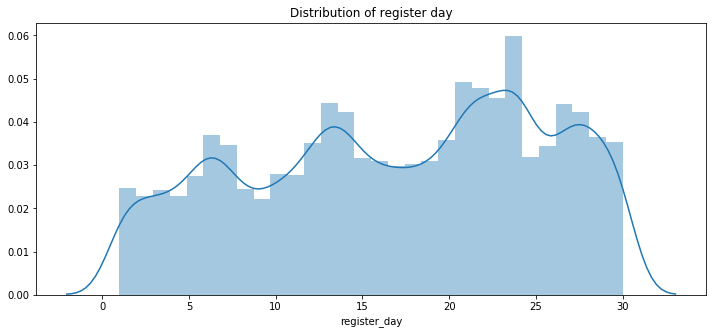

In [31]:
# sns.countplot(x='register_day', data=df_user_register

plt.figure(figsize=(12,5))
plt.title("Distribution of register day")
ax = sns.distplot(df_user_register["register_day"],bins=30)

In [32]:
temp = df_user_register['register_type'].value_counts()
print(temp)

0     22919
1     16124
2      8171
3      1830
4       835
5       825
6       419
7       287
8        46
9        12
10        7
11        5
Name: register_type, dtype: int64


In [59]:
# rt9_10_11_user = 
print(df_user_register[df_user_register['register_type'].isin([9,10,11])])

       user_id  register_day  register_type  device_type
5012    237290            30             11         3033
5197    813004            22              9          894
7622    910982            26             11           10
9225    197498            17              9          513
10097   467164            14              9          525
11667  1282663            21              9          785
13804   932703            24              9          861
15819   556382            19              9          815
19077   643857            22             11           10
21069   275911            12              9          784
23666    96811            25              9          910
27901   303474            28             10         1300
30197   105898            19             10         1919
30827   772469            23              9          867
35717   451926            16              9          239
36060   322106            22             10          239
37802   451825            20   

In [34]:
df_user_register['register_type'] = df_user_register['register_type'].astype(np.uint8)

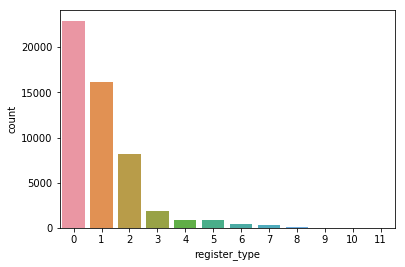

In [36]:
sns.countplot(x='register_type', data=df_user_register)
# plt.figure(figsize=(12,5))
# plt.title("Distribution of register type")
# ax = sns.distplot(df_user_register["register_type"],bins=12)

3    1290
0     760
1     537
2     265
5      45
4      44
7      17
6      14
8       6
9       1
Name: register_type, dtype: int64


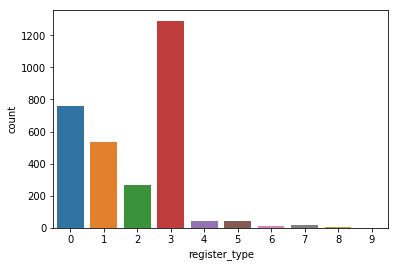

In [40]:
temp_day24 = df_user_register[df_user_register["register_day"]==24]
print(temp_day24["register_type"].value_counts())
sns.countplot(x='register_type', data=temp_day24)

In [80]:
# print(temp_day24[temp_day24["register_type"]==3]["device_type"].value_counts())

In [75]:
temp_day23 = df_user_register[df_user_register["register_day"]==23]
# print(temp_day23[temp_day23["register_type"]==3]["device_type"].value_counts())
# sns.countplot(x='device_type', data=temp_rt3)

In [65]:
temp = df_user_register['device_type'].value_counts()
# print(temp)
# plt.figure(figsize=(12,5))
# df_user_register['device_type'] = df_user_register['device_type'].astype(np.uint16)
# sns.countplot(x='device_type', data=df_user_register)

In [82]:
print(df_user_register[(df_user_register['device_type']==1)])

       user_id  register_day  register_type  device_type  dt_count
212     288007            24              4            1      1151
8434    906864            25              3            1      1151
10828   887048            24              4            1      1151
11128   461135            25              3            1      1151
12907   470632            24              4            1      1151
14115   236223            25              3            1      1151
14116   999561            25              3            1      1151
14404  1318686            24              4            1      1151
19131    44678            25              3            1      1151
20009   658261            25              3            1      1151
25146  1343035            25              3            1      1151
29685     1066            26              3            1      1151
31125   988353            24              4            1      1151
32873  1026168            24              4            1      

In [71]:
df_user_register["dt_count"] = df_user_register.groupby(['device_type'])['device_type'].transform("count")

In [79]:
# df_user_register[df_user_register["dt_count"]==1]

In [ ]:
# check out the outlier users 

In [73]:
user_outliers = df_user_register[(df_user_register["register_day"]==24)&(df_user_register["register_type"]==3)&((df_user_register["device_type"]==1)|(df_user_register["device_type"]==223)|(df_user_register["device_type"]==83))]["user_id"].unique().tolist()


In [74]:
df_user_register = df_user_register[~df_user_register["user_id"].isin(user_outliers)]
df_app_launch = df_app_launch[~df_app_launch["user_id"].isin(user_outliers)]
df_video_create = df_video_create[~df_video_create["user_id"].isin(user_outliers)]
df_user_activity = df_user_activity[~df_user_activity["user_id"].isin(user_outliers)]

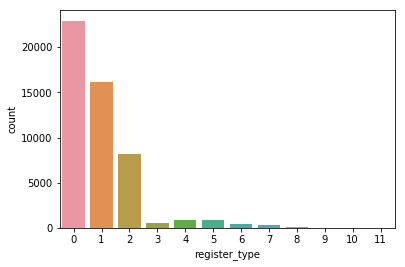

In [81]:
sns.countplot(x='register_type', data=df_user_register)

In [83]:
dt1_user = df_user_register[(df_user_register['device_type']==1)]["user_id"].tolist()

In [88]:
df_app_launch[df_app_launch["user_id"].isin(dt1_user)]


,user_id,app_launch_day
75487,1026168,24
75662,1179908,24
77667,999561,25
127447,1336013,13
159491,988353,24
159636,1316993,24
160276,470632,24
161109,243240,25
161259,906864,25
161884,44678,25


In [89]:
df_user_activity[df_user_activity["user_id"].isin(dt1_user)]

,user_id,user_activity_day,page,video_id,author_id,action_type


In [93]:
user_outliers = list(set(user_outliers+dt1_user))
print(len(user_outliers))

1297


In [91]:
df_user_register = df_user_register[~df_user_register["user_id"].isin(dt1_user)]
df_app_launch = df_app_launch[~df_app_launch["user_id"].isin(dt1_user)]
df_video_create = df_video_create[~df_video_create["user_id"].isin(dt1_user)]
df_user_activity = df_user_activity[~df_user_activity["user_id"].isin(dt1_user)]

In [94]:
df_app_launch.shape

(251199, 2)

In [95]:
df_app_launch["user_id"].nunique()

50183

In [96]:
df_user_activity["user_id"].nunique()

43488

In [99]:
df_app_launch.columns


Index(['user_id', 'app_launch_day'], dtype='object')

In [100]:
df_user_activity.columns

Index(['user_id', 'user_activity_day', 'page', 'video_id', 'author_id',
       'action_type'],
      dtype='object')

In [114]:
app_user = df_app_launch[df_app_launch["app_launch_day"]<=16]["user_id"].unique()
activity_user = df_user_activity[df_user_activity["user_activity_day"]<=16]["user_id"].unique()
temp_unact_user = list(set(app_user)-set(activity_user))

In [115]:
len(temp_unact_user)

3387

In [116]:
app_user_25 = df_app_launch[df_app_launch["app_launch_day"]>23]["user_id"].unique()

In [117]:
in_app = list(set(app_user_25).intersection(temp_unact_user))

In [118]:
print(len(in_app))

372


In [119]:
print("ratio of user with activity ", len(in_app)/len(app_user_25))

ratio of user with activity  0.011969882231803848


In [120]:
# set a mark to dictate if a user launched an app had any activity


In [121]:
df_video_create.columns

Index(['user_id', 'video_create_day'], dtype='object')

In [125]:
video_user = df_video_create[df_video_create["video_create_day"]<=23]["user_id"].unique()
len(video_user)

5327

In [124]:
in_app_video =  list(set(app_user_25).intersection(video_user))
len(in_app_video)

3508

In [126]:
# mark if a user created video 